# University Admission Prediction

Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

Load the dataset

In [2]:
df = pd.read_csv("datasets/adm_data.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Shows the summary of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


Generate the descriptive statistics of the dataset

In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Split the feature and target columns

In [5]:
X = df.drop(["Chance of Admit "], axis=1)
y = pd.DataFrame(df["Chance of Admit "]).copy()

Keep the feature names

In [6]:
feature_names = X.columns

Split the training and testing set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(320, 8) (80, 8) (320,) (80,)


Scale the data using standard scaler

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Model Training

Train a linear regression model

In [16]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)
print(f"Training R2 = {mlr.score(X_train, y_train):.3f}")

Training R2 = 0.816


Train a knn model

In [18]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
print(f"Training R2 = {knn.score(X_train, y_train):.3f}")

Training R2 = 0.865


Train a random forest model

In [19]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print(f"Training R2 = {rf.score(X_train, y_train):.3f}")

Training R2 = 0.972


Combine all the model using Voting Regressor

In [13]:
voting_regressor = VotingRegressor([('mlr', mlr), ('rf', rf), ('knn', knn)])
voting_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('mlr', LinearRegression()),
                            ('rf', RandomForestRegressor()),
                            ('knn', KNeighborsRegressor())])

In [14]:
y_train_pred = voting_regressor.predict(X_train)
y_test_pred = voting_regressor.predict(X_test)

In [29]:
print(f"Training R2 = {r2_score(y_train, y_train_pred):.3f}")
print(f"Training RMSE = {mean_squared_error(y_train, y_train_pred, squared=False):.3f}")

Training R2 = 0.911
Training RMSE = 0.041


## Model Evaluation

In [28]:
print(f"MLR Training R2 = {mlr.score(X_test, y_test):.3f}")
print(f"KNN Training R2 = {knn.score(X_test, y_test):.3f}")
print(f"RF Training R2 = {rf.score(X_test, y_test):.3f}")
print(f"VR Training R2 = {voting_regressor.score(X_test, y_test):.3f}")

MLR Training R2 = 0.817
KNN Training R2 = 0.809
RF Training R2 = 0.819
VR Training R2 = 0.834


We can see that the votingregressor achieve better r2 score on testing set, compared to the others

Visualize the actual vs. predicted and residual

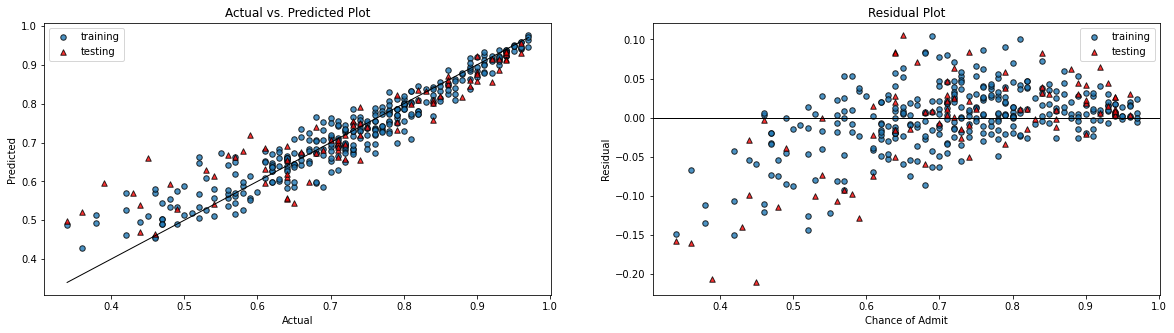

In [15]:
residual_train = y_train - y_train_pred
residual_test = y_test - y_test_pred

fig=plt.figure(figsize=(20,5))

ax1=plt.subplot(1,2,1)
ax1.scatter(y_train, y_train_pred, s=30, alpha=0.8, edgecolor="black", label="training")
ax1.scatter(y_test, y_test_pred, marker="^", s=30, c="r", alpha=0.8, edgecolor="black", label="testing")
ax1.plot([y.min(), y.max()], [y.min(), y.max()], "k", lw=1)
ax1.set_title("Actual vs. Predicted Plot")
ax1.set_xlabel("Actual")
ax1.set_ylabel("Predicted")
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.scatter(y_train, residual_train, s=30, alpha=0.8, edgecolor="black", label="training")
ax2.scatter(y_test, residual_test, marker="^", s=30, c="r", alpha=0.8, edgecolor="black", label="testing")
ax2.axhline(y=0.0, linewidth= 1, linestyle="-", c="black")
ax2.legend()
ax2.set_title("Residual Plot")
ax2.set_xlabel("Chance of Admit")
ax2.set_ylabel("Residual")

plt.show()